In [21]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [22]:
# Importing Dataset
data = pd.read_csv('./dataset.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [23]:
# Number of null values in every column
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


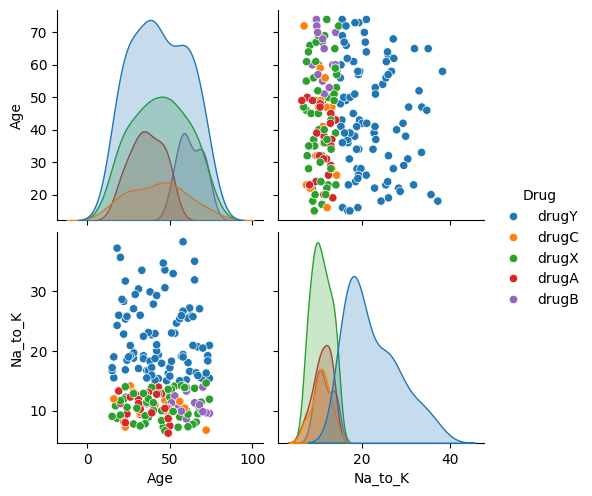

In [24]:
# Creates matrix of scatter plots for pairs of numerical variable, here it is between Age and Na_to_K
sns.pairplot(data,hue='Drug')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [26]:
# Splitting the data into Independent and Dependent Set
X = pd.get_dummies(data.drop('Drug', axis=1), drop_first=True, dtype=int) # does Encoding also
Y = data['Drug']
print(X)

     Age  Na_to_K  Sex_M  BP_LOW  BP_NORMAL  Cholesterol_NORMAL
0     23   25.355      0       0          0                   0
1     47   13.093      1       1          0                   0
2     47   10.114      1       1          0                   0
3     28    7.798      0       0          1                   0
4     61   18.043      0       1          0                   0
..   ...      ...    ...     ...        ...                 ...
195   56   11.567      0       1          0                   0
196   16   12.006      1       1          0                   0
197   52    9.894      1       0          1                   0
198   23   14.020      1       0          1                   1
199   40   11.349      0       1          0                   1

[200 rows x 6 columns]


In [27]:
# Splitting the data into Training and Testing Set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=44)

In [28]:
# Importing the Decision Tree Classifier and training the model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [29]:
# Prediction of model based on Testing Set
Test_prediction = model.predict(X_test)

In [30]:
# Calculating the Accuracy of the model
from sklearn.metrics import accuracy_score , confusion_matrix, ConfusionMatrixDisplay,classification_report
accuracy_score(Y_test, Test_prediction)

0.96

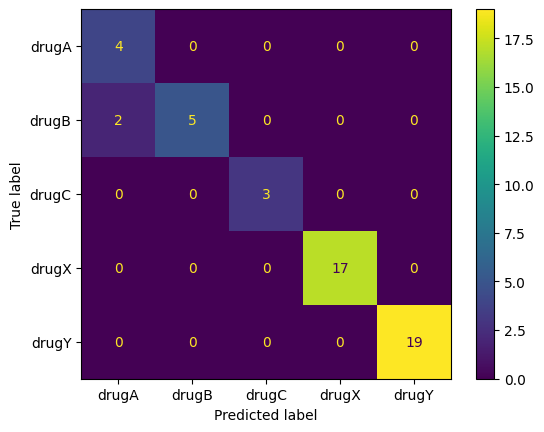

In [31]:
# Plotting the Confusion Matrix between the Expected value and Predicted Value
confusion_matrix(Y_test,Test_prediction)
ConfusionMatrixDisplay.from_predictions(Y_test,Test_prediction)

In [32]:
# Preparing the Classification report of the model
print(classification_report(Y_test, Test_prediction))

              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         4
       drugB       1.00      0.71      0.83         7
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        17
       drugY       1.00      1.00      1.00        19

    accuracy                           0.96        50
   macro avg       0.93      0.94      0.93        50
weighted avg       0.97      0.96      0.96        50



Adjusting Hyperparameters
( Using Entropy as Criterion instead of Gini Index )

In [33]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature importance']).sort_values('Feature importance')

,Feature importance
Sex_M,0.000000
Cholesterol_NORMAL,0.104033
Age,0.119467
BP_LOW,0.130178
BP_NORMAL,0.160949
Na_to_K,0.485374


[Text(0.75, 0.9, 'Na_to_K <= 14.829\ngini = 0.682\nsamples = 150\nvalue = [19, 9, 13, 37, 72]'),
 Text(0.625, 0.7, 'BP_NORMAL <= 0.5\ngini = 0.675\nsamples = 78\nvalue = [19, 9, 13, 37, 0]'),
 Text(0.5, 0.5, 'BP_LOW <= 0.5\ngini = 0.723\nsamples = 50\nvalue = [19, 9, 13, 9, 0]'),
 Text(0.25, 0.3, 'Age <= 53.0\ngini = 0.436\nsamples = 28\nvalue = [19, 9, 0, 0, 0]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [19, 0, 0, 0, 0]'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0, 0, 0]'),
 Text(0.75, 0.3, 'Cholesterol_NORMAL <= 0.5\ngini = 0.483\nsamples = 22\nvalue = [0, 0, 13, 9, 0]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 9, 0]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 0, 28, 0]'),
 Text(0.875, 0.7, 'gini = 0.0\nsamples = 72\nvalue = [0, 0, 0, 0, 72]')]

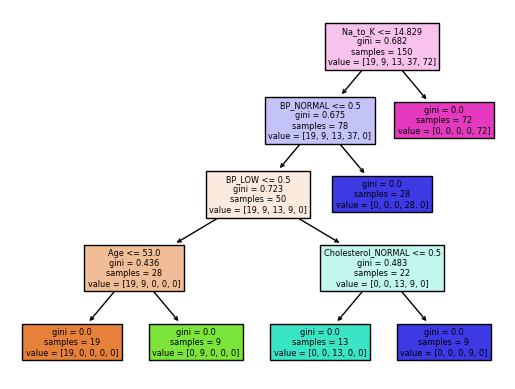

In [34]:
# Plotting the Decision Tree
from sklearn.tree import plot_tree
plot_tree(model, feature_names=X.columns, filled=True)

In [35]:
# Function to calculate Performance metric for model
def Model_Reports(model):
    model_prediction= model.predict(X_test)
    print(classification_report(Y_test, model_prediction))
    accuracy_score(Y_test, model_prediction)
    print('\n')
    plt.figure(figsize=(12,8), dpi=200)
    plot_tree(model, feature_names=X.columns, filled=True)

              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         4
       drugB       1.00      0.71      0.83         7
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        17
       drugY       1.00      1.00      1.00        19

    accuracy                           0.96        50
   macro avg       0.93      0.94      0.93        50
weighted avg       0.97      0.96      0.96        50





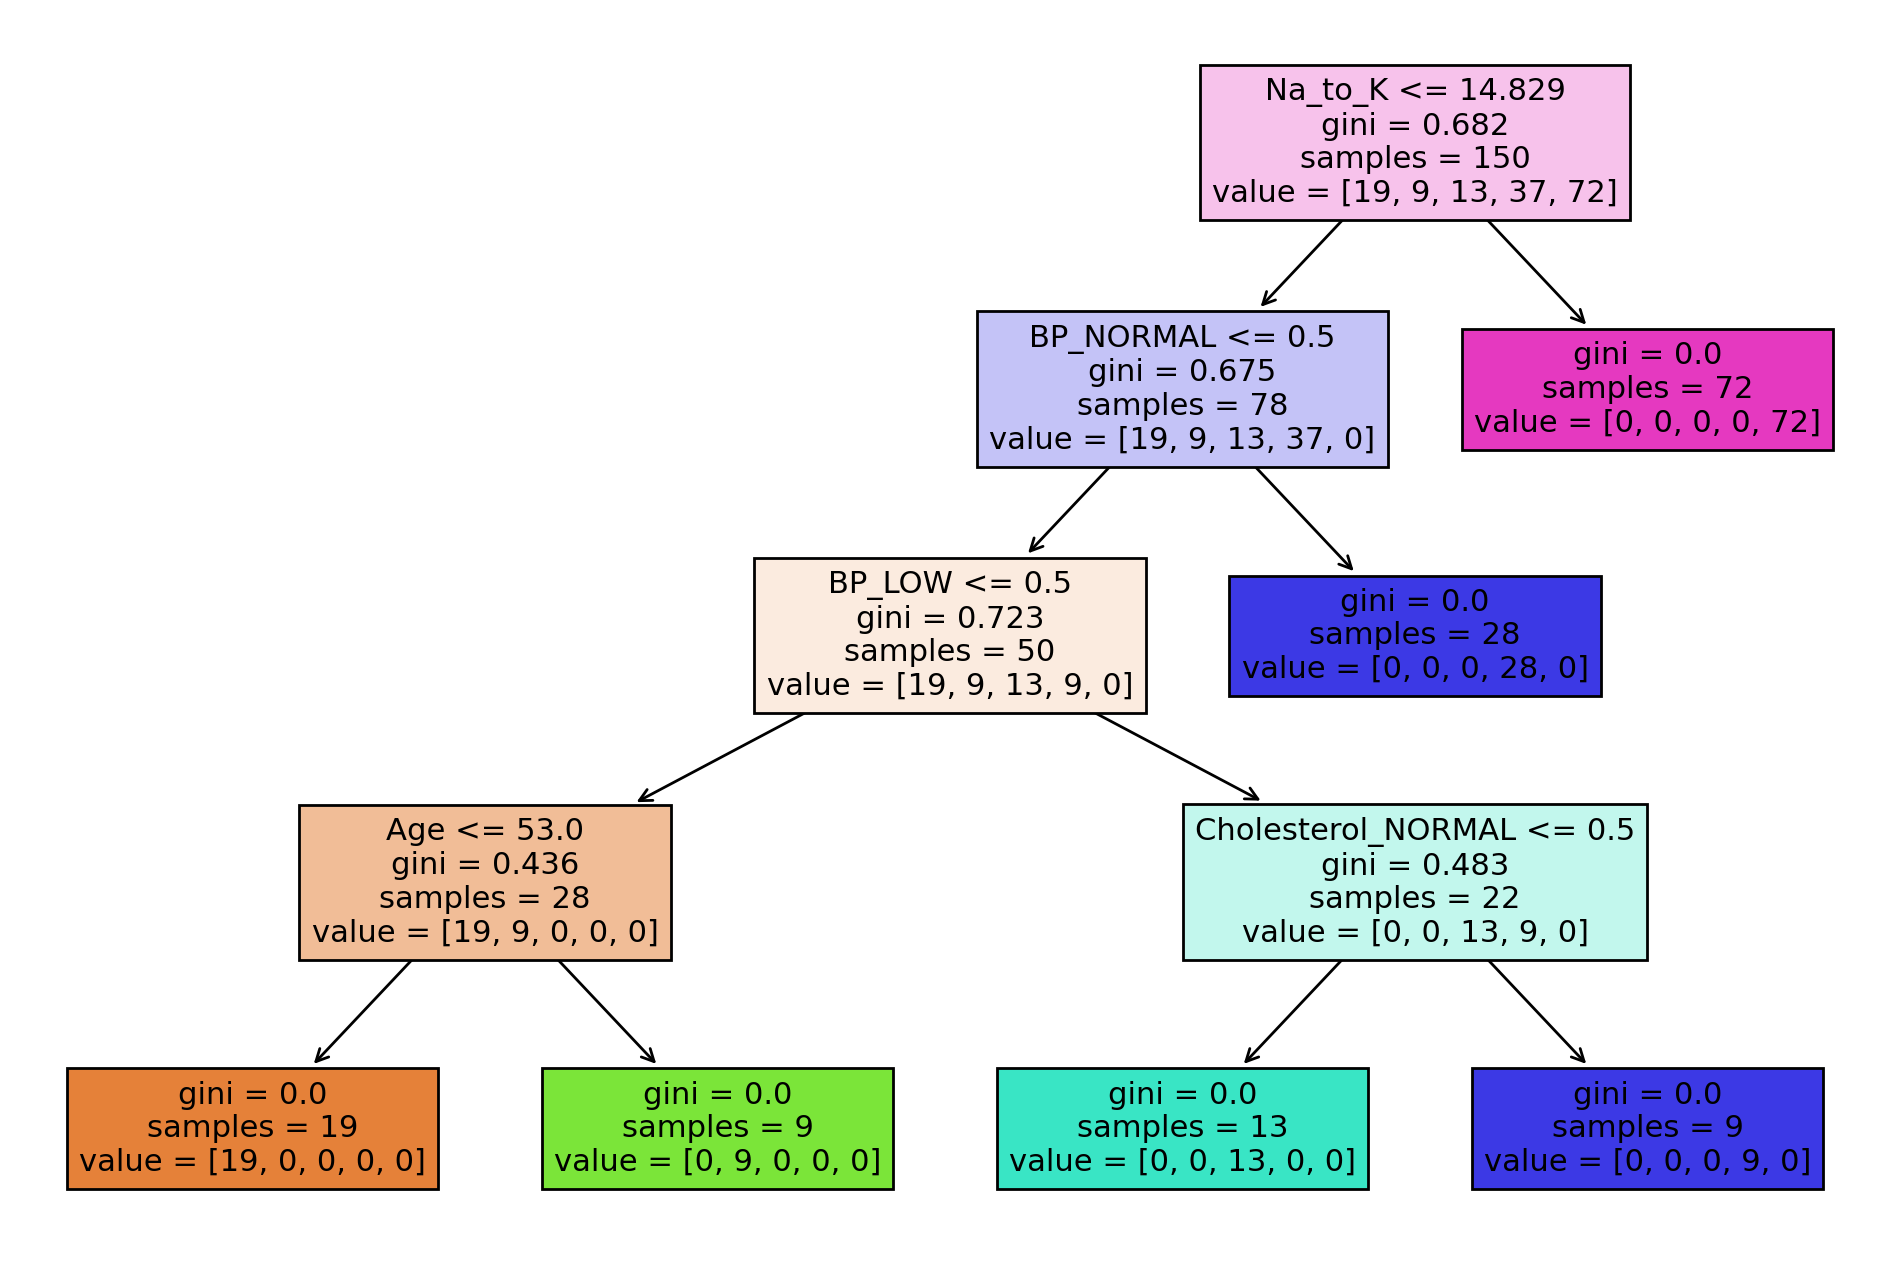

In [36]:
# Fucntion Call
Model_Reports(model)

              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         4
       drugB       1.00      0.71      0.83         7
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        17
       drugY       1.00      1.00      1.00        19

    accuracy                           0.96        50
   macro avg       0.93      0.94      0.93        50
weighted avg       0.97      0.96      0.96        50





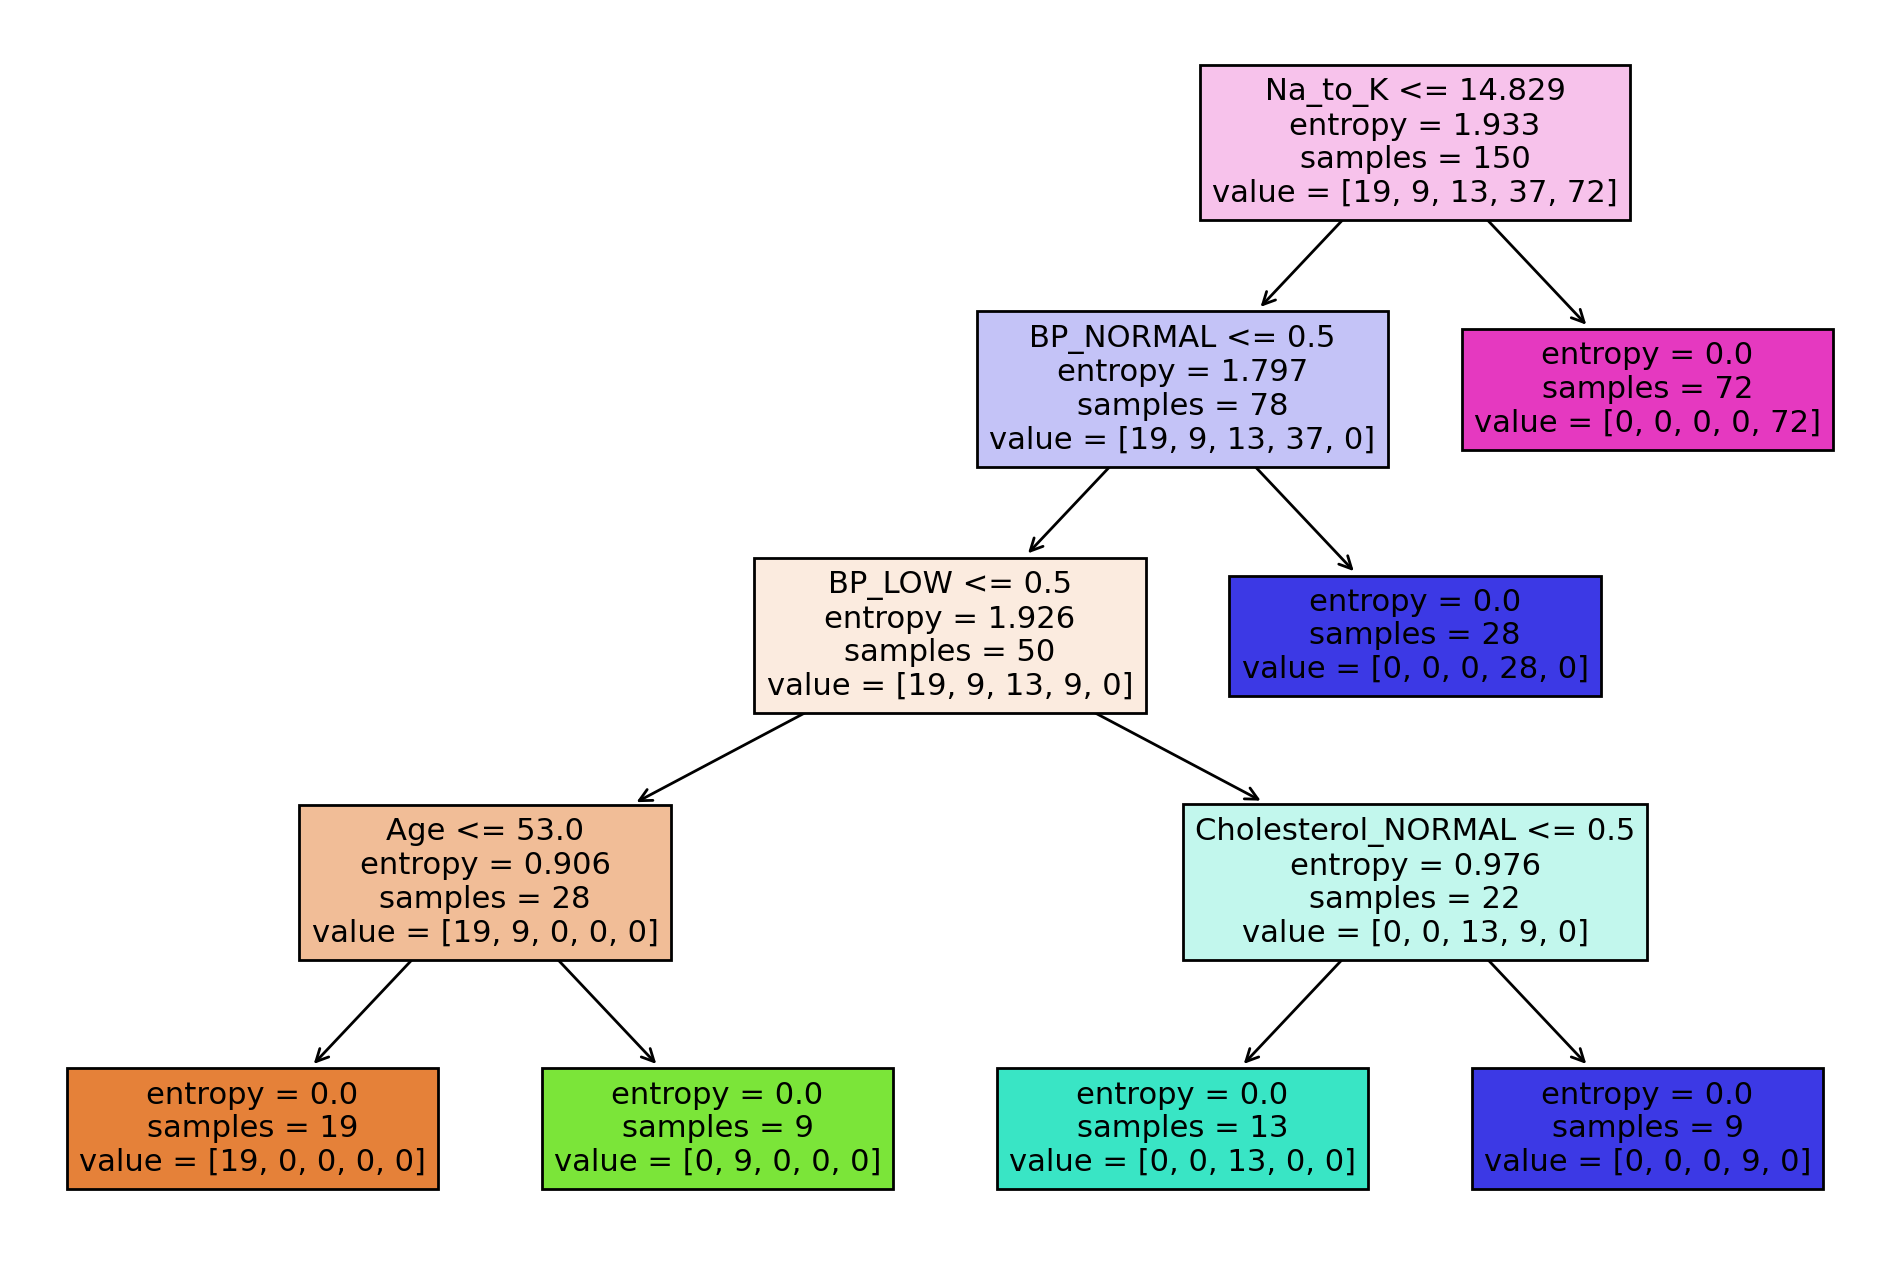

In [37]:
# Setting Entropy as the criterion
entropy_model = DecisionTreeClassifier(criterion='entropy')
entropy_model.fit(X_train, Y_train)
Model_Reports(entropy_model)

In [38]:

# Saving the Trained Model 
import joblib
# Save your trained model to a file
joblib.dump(model, 'model_file.pkl')
# Load the model from the file
loaded_model = joblib.load('model_file.pkl')

In [39]:
# 47 M LOW NORMAL 30.568 drugY
campaign = [[47,30.568,1,1,0,1]]
loaded_model.predict(campaign)

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['drugY'], dtype=object)